<a href="https://colab.research.google.com/github/daniyal828/Machine-Learning-Projects/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras import regularizers

# Set aesthetic and reproducibility
sns.set(style="darkgrid")
np.random.seed(203)


In [2]:
data = pd.read_csv(r"creditcard.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
# Shape and basic info
print("Shape of dataset:", data.shape)
print("\nData types and missing values:")
print(data.info())

# Quick stats
print("\nDescriptive statistics:")
print(data.describe())

# Check class distribution
print("\nClass distribution:")
print(data['Class'].value_counts(normalize=True))


Shape of dataset: (7973, 31)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 

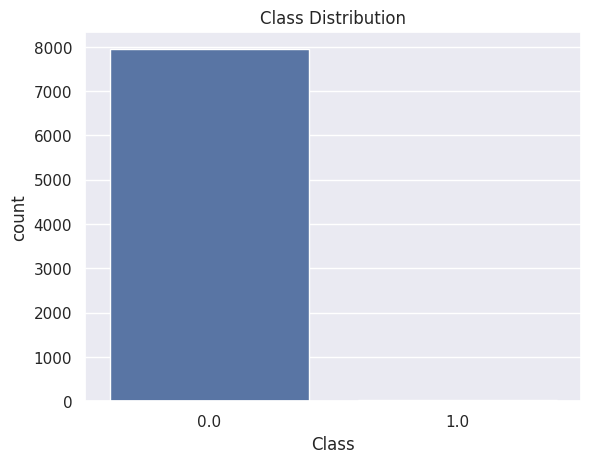

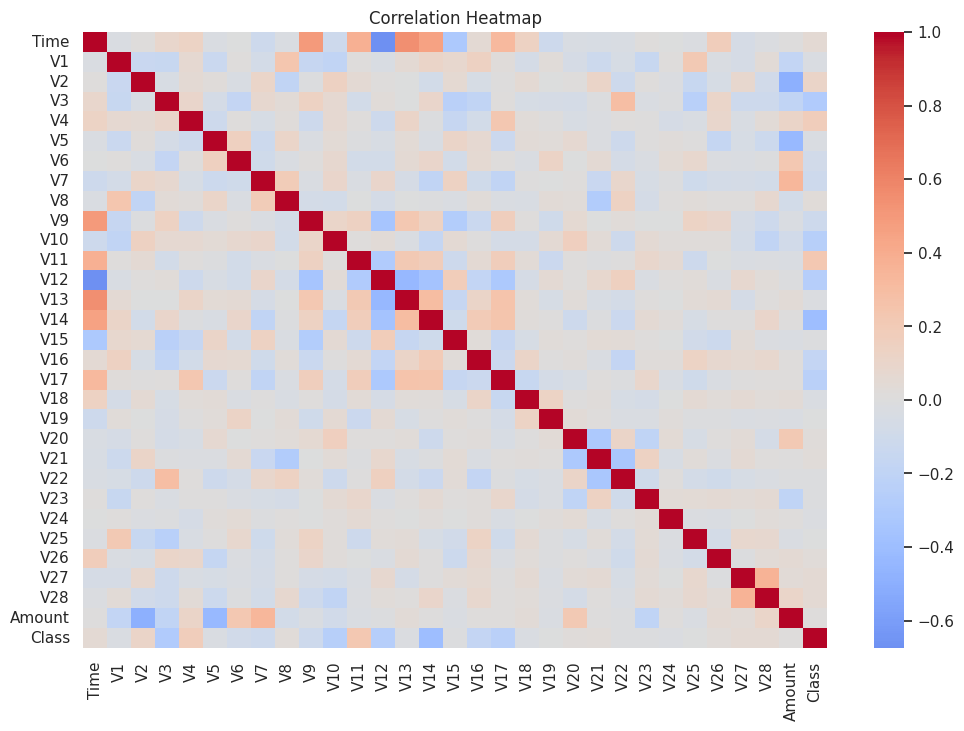

In [4]:
# Distribution of the target variable
sns.countplot(data=data, x='Class')
plt.title("Class Distribution")
plt.show()

# Correlation heatmap (focus on top features)
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


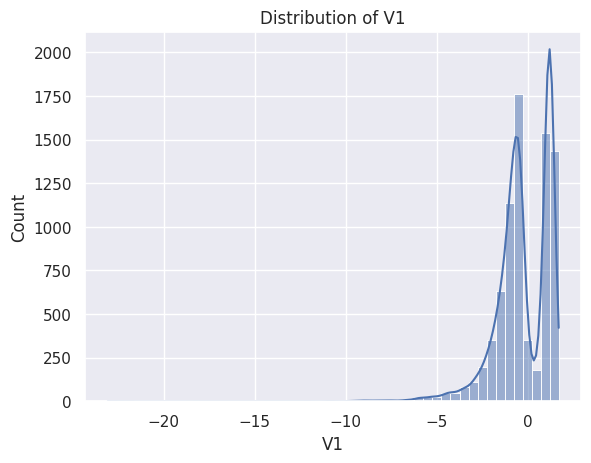

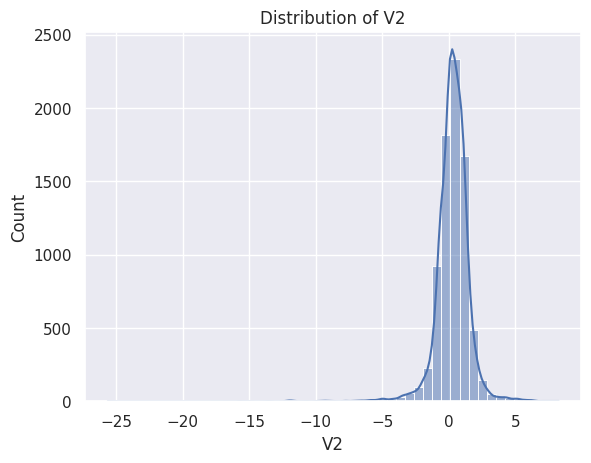

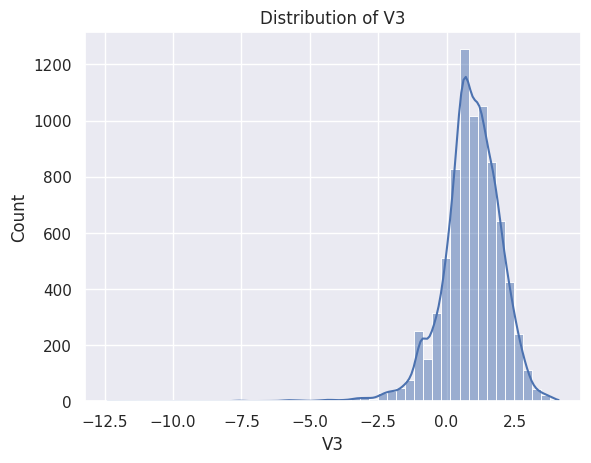

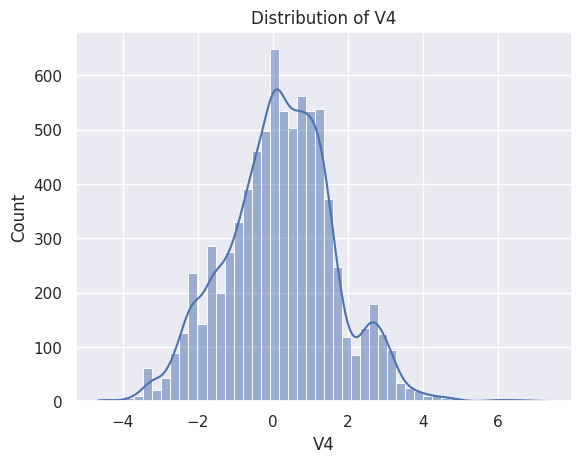

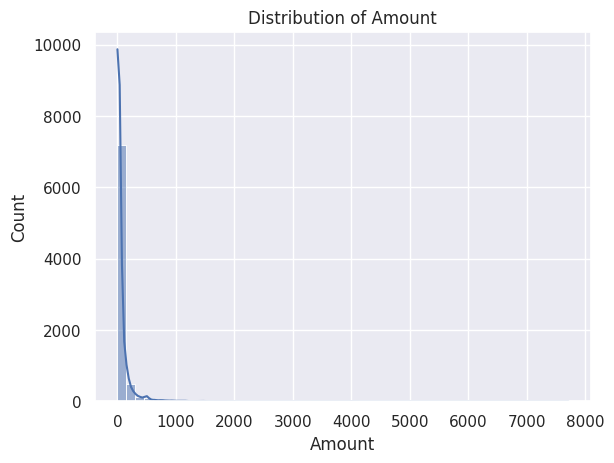

In [5]:
# Visualize distribution for a few numerical features
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'Amount']
for feature in features_to_plot:
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


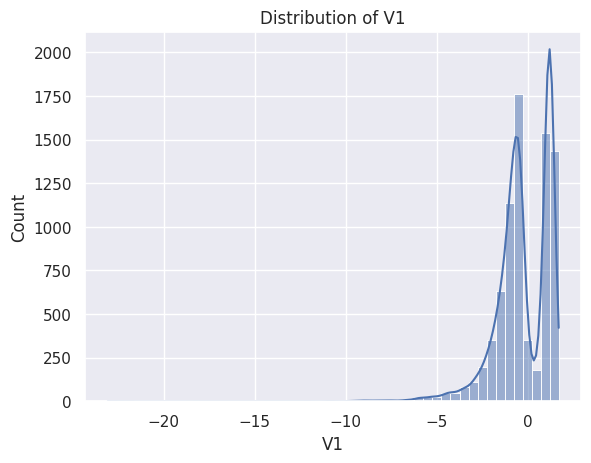

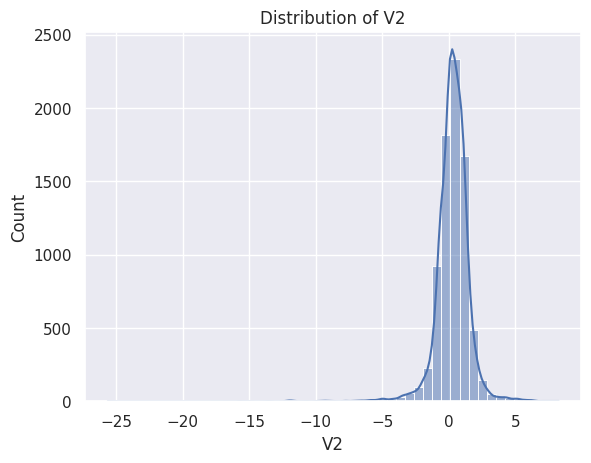

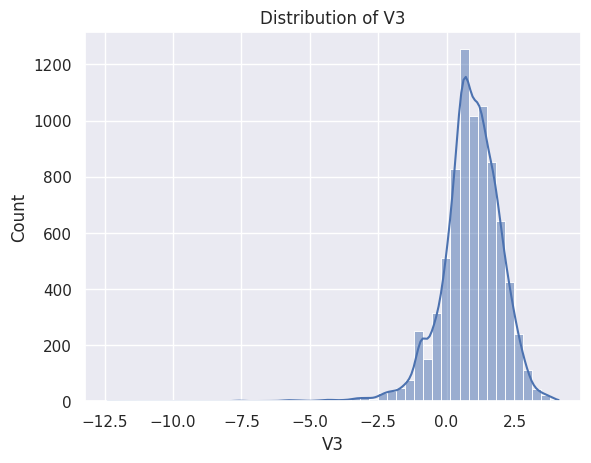

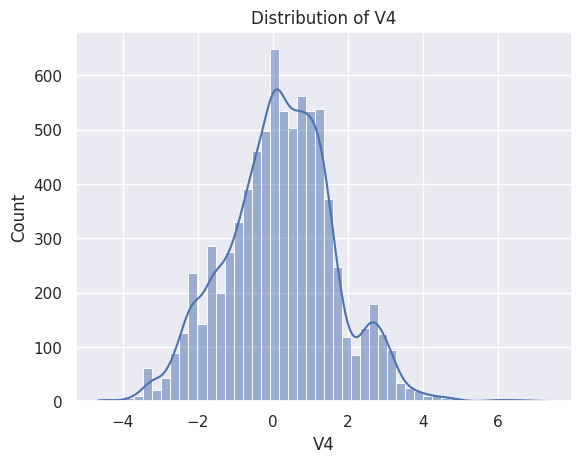

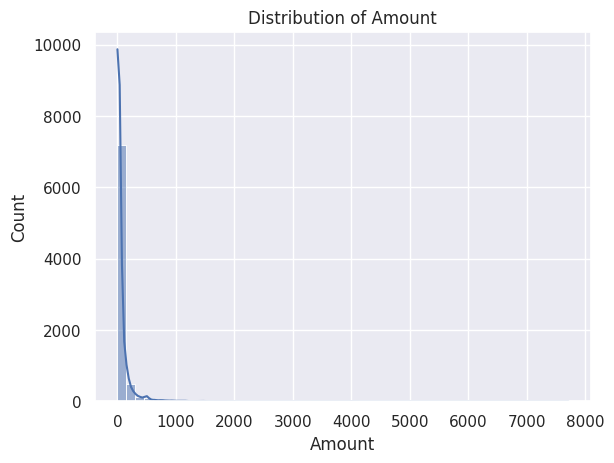

In [6]:
# Visualize distribution for a few numerical features
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'Amount']
for feature in features_to_plot:
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


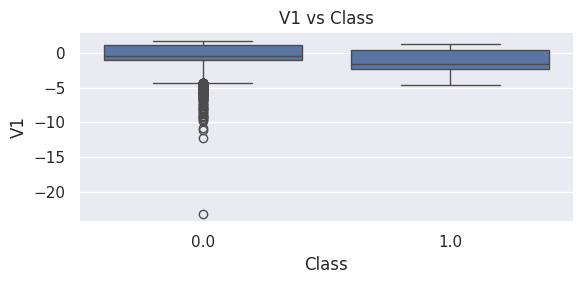

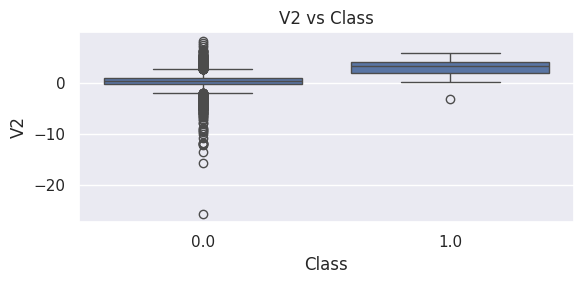

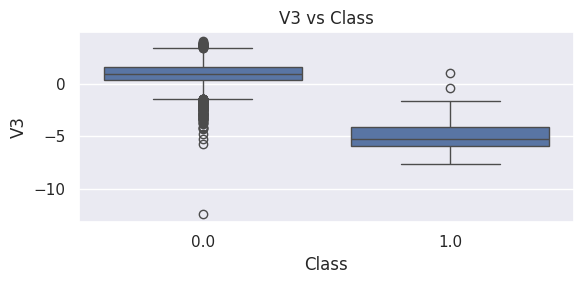

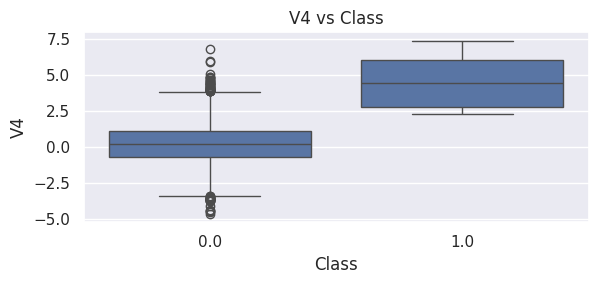

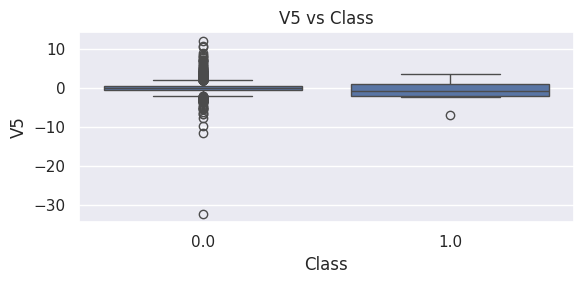

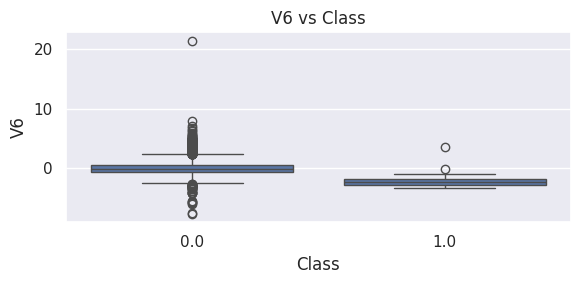

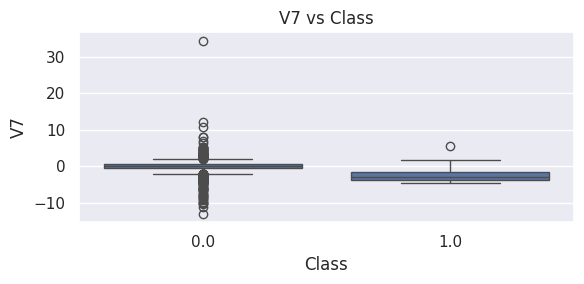

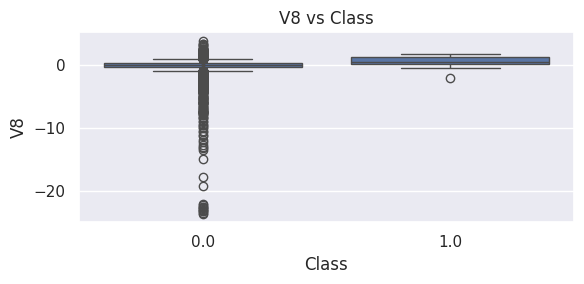

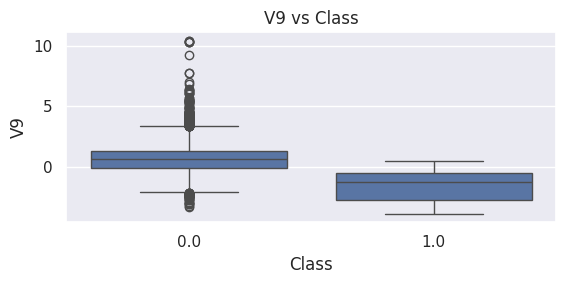

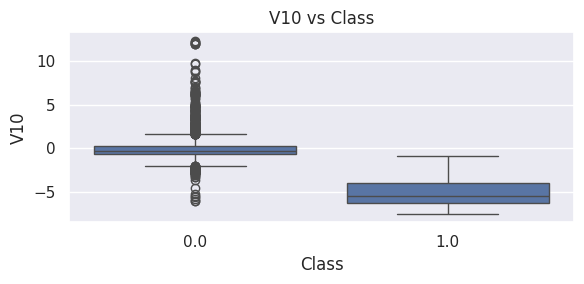

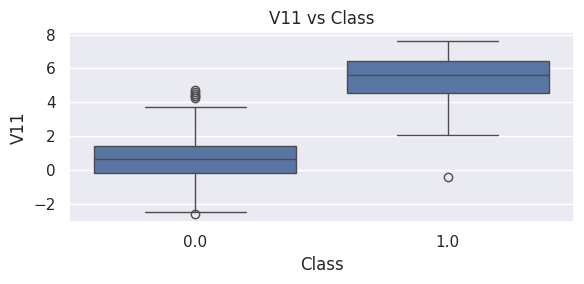

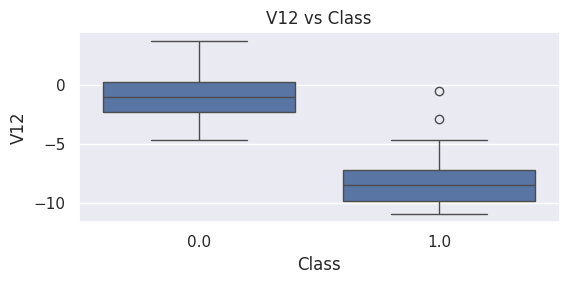

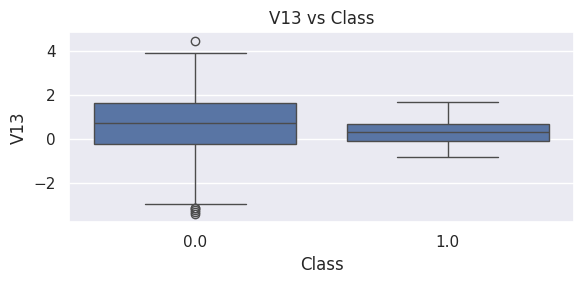

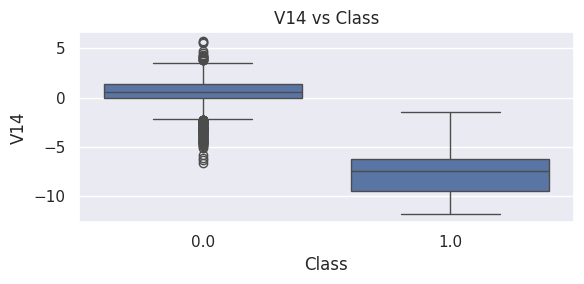

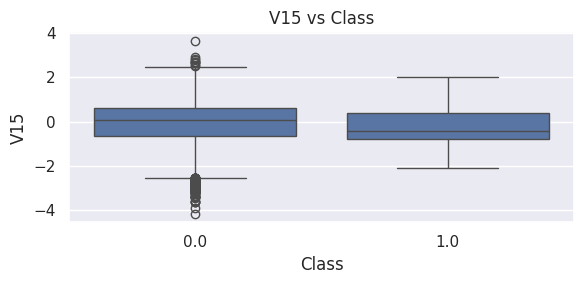

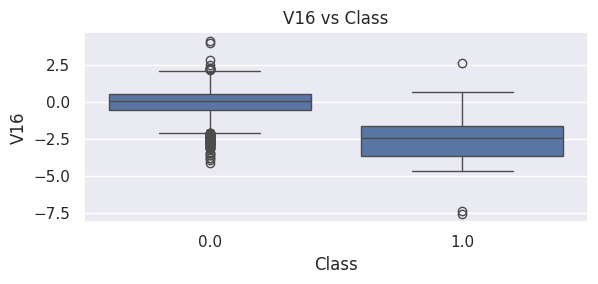

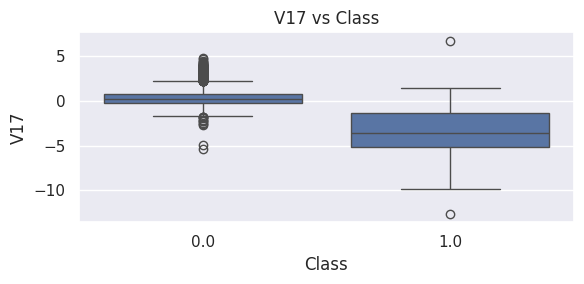

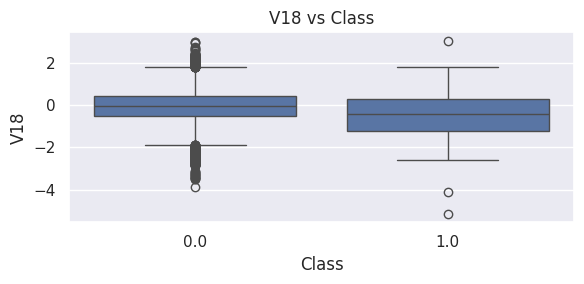

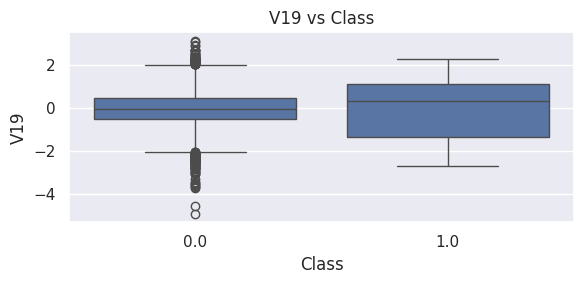

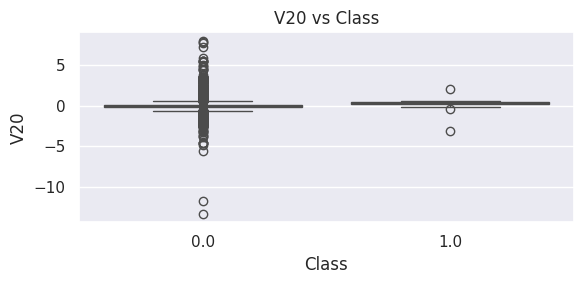

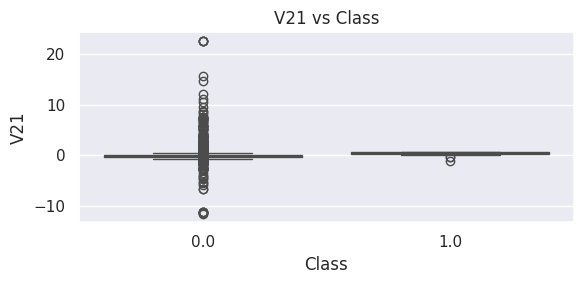

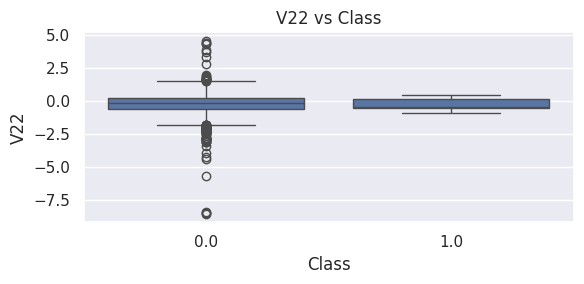

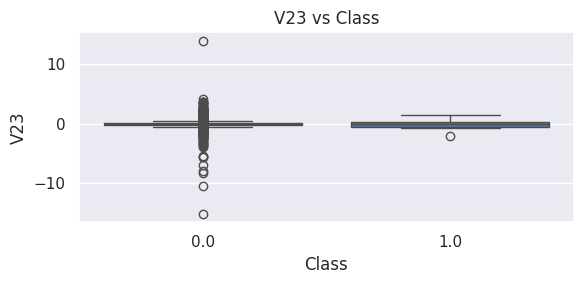

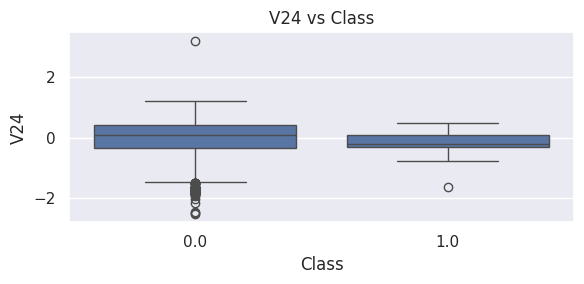

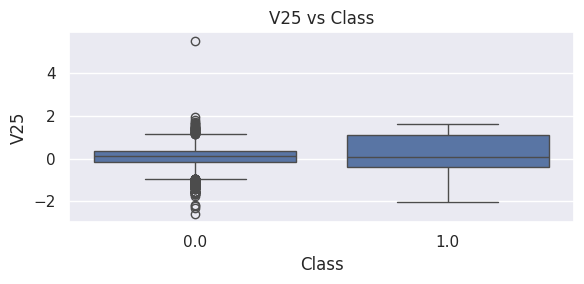

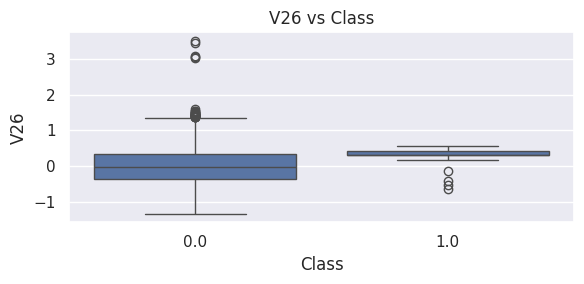

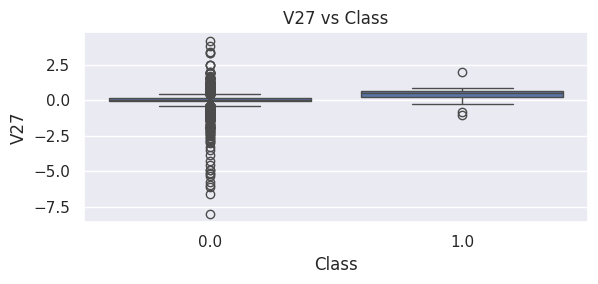

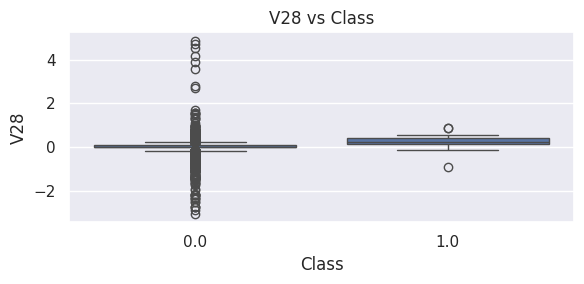

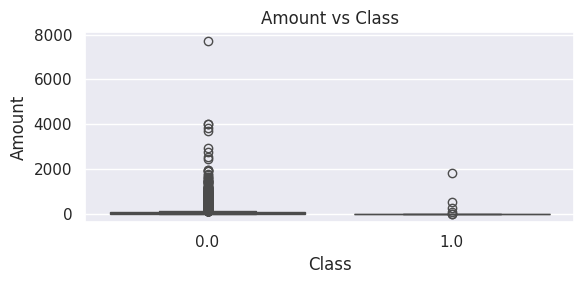

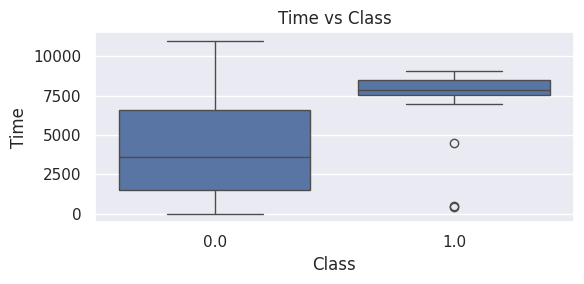

In [7]:
# Boxplots to compare feature distributions between Class 0 and Class 1
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
            'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
            'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
            'V25', 'V26', 'V27', 'V28', 'Amount', 'Time']

for feature in features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(f'{feature} vs Class')
    plt.tight_layout()
    plt.show()


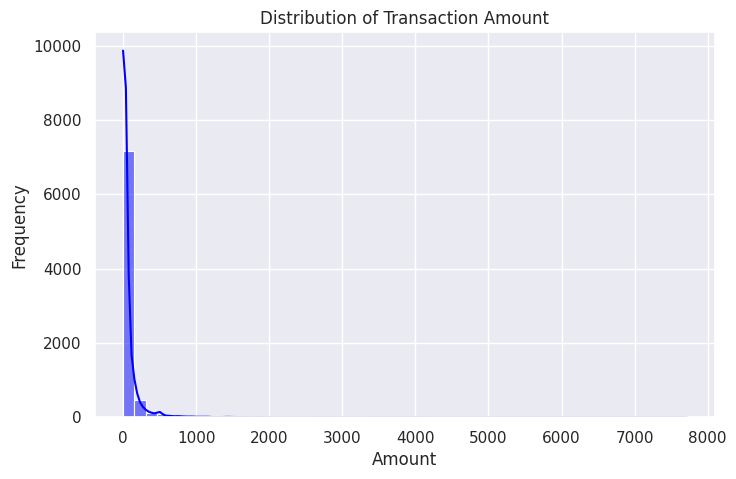


Descriptive statistics for 'Amount':
count    7972.000000
mean       65.413540
std       194.911169
min         0.000000
25%         4.617500
50%        15.950000
75%        54.910000
max      7712.430000
Name: Amount, dtype: float64


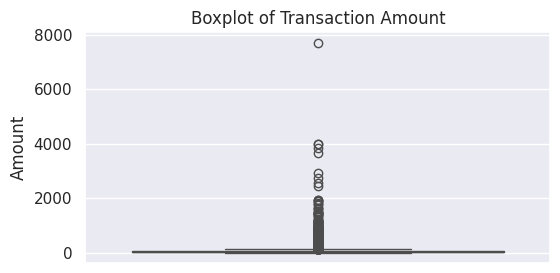

In [8]:
# Distribution of 'Amount' feature
plt.figure(figsize=(8, 5))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for Amount
print("\nDescriptive statistics for 'Amount':")
print(data['Amount'].describe())

# Boxplot to detect outliers
plt.figure(figsize=(6, 3))
sns.boxplot(data['Amount'], color='orange')
plt.title('Boxplot of Transaction Amount')
plt.show()


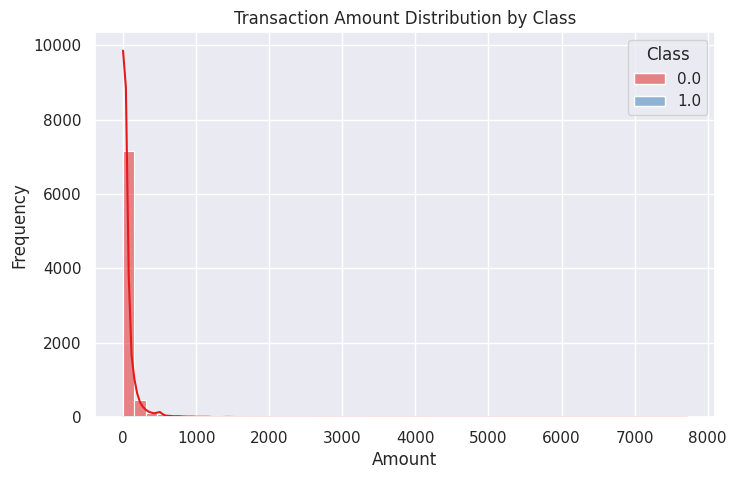

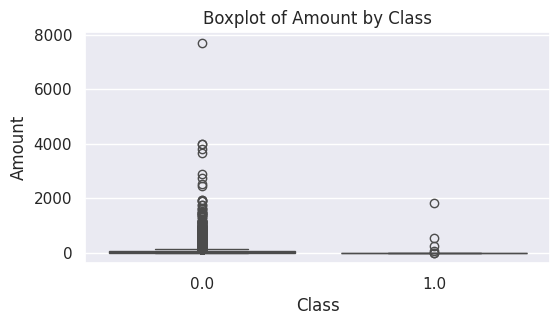

In [9]:
# Distribution of Amount by Class
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Amount', hue='Class', bins=50, kde=True, palette='Set1')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Amount by Class (Fraud vs Non-Fraud)
plt.figure(figsize=(6, 3))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Amount by Class')
plt.show()
